In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Play,Outlook,Temperature,Humidity,Wind
0,no,sunny,85.0,85.0,False
1,no,sunny,80.0,90.0,True
2,yes,overcast,83.0,78.0,False
3,yes,rain,70.0,96.0,False
4,yes,rain,68.0,80.0,False
5,no,rain,65.0,70.0,True
6,yes,overcast,64.0,65.0,True
7,no,sunny,72.0,95.0,False
8,yes,sunny,69.0,70.0,False
9,yes,rain,75.0,80.0,False


In [4]:
labels = df["Play"].values.copy()
features =  df.copy()

is_sunny = np.where(features.values.T[0] == "sunny", 1, 0)
is_overcast = np.where(features.values.T[0] == "overcast", 1, 0)
is_rain = np.where(features.values.T[0] == "rain", 1, 0)

features["is_sunny"] = pd.Series(is_sunny, index=features.index)
features["is_overcast"] = pd.Series(is_overcast, index=features.index)
features["is_rain"] = pd.Series(is_rain, index=features.index)

labels = np.where(labels == "no", 0, 1)

features = features.drop(columns = ["Play", "Outlook"])
features

,Temperature,Humidity,Wind,is_sunny,is_overcast,is_rain
0,85.0,85.0,False,0,0,0
1,80.0,90.0,True,0,0,0
2,83.0,78.0,False,0,0,0
3,70.0,96.0,False,0,0,0
4,68.0,80.0,False,0,0,0
5,65.0,70.0,True,0,0,0
6,64.0,65.0,True,0,0,0
7,72.0,95.0,False,0,0,0
8,69.0,70.0,False,0,0,0
9,75.0,80.0,False,0,0,0


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
my_tree = DecisionTreeClassifier()
my_tree = my_tree.fit(features, labels)
my_tree.score(features, labels)

1.0

100% accuracy means everything has been correctly labelized...

In [7]:
def generate_all_possible_split_train(qte_removed, feat, labls):
    
    test_dataset = []
    train_dataset = []
    
    labels_test_dataset = []
    labels_train_dataset = []
    
    chain = np.arange(qte_removed)
    
    while chain[0] != len(feat) - qte_removed:
        
        test_this_time = []
        train_this_time = []
        
        label_test = []
        label_train = []
        
        for idf, f in enumerate(feat):
            if idf in chain:
                test_this_time.append(f)
                label_test.append(labls[idf])
            else:
                train_this_time.append(f)
                label_train.append(labls[idf])
        
        yield train_this_time, test_this_time, label_train, label_test
        
        for elem in range(len(chain)-1, -1, -1):
            if(chain[elem] < len(feat) - len(chain) + elem):
                chain[elem] += 1
                
                at_fix = 1
                for elem_to_fix in range(elem+1, len(chain), 1):
                    chain[elem_to_fix] = chain[elem] + at_fix
                    at_fix += 1
                break

In [8]:
scores = {}
for X, x, Y, y in generate_all_possible_split_train(3, features.values, labels):
    my_tree = DecisionTreeClassifier()
    my_tree = my_tree.fit(X, Y)
    score = my_tree.score(x, y)
    if(not score in scores):
        scores[score] = 1
    else:
        scores[score] += 1

In [9]:
import matplotlib.pyplot as plt

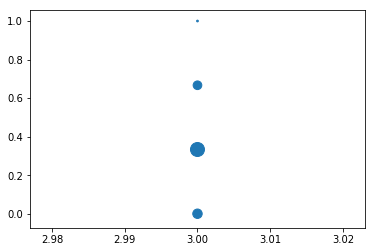

In [10]:
scores_y_axis = []
score_size = []
for key, value in scores.items():
    scores_y_axis.append(key)
    score_size.append(value)

plt.scatter(np.ones(len(scores_y_axis))*3, scores_y_axis, s = score_size)

In [11]:
from tqdm import tqdm_notebook as tqdm

In [76]:
def calcualte_all_decision_trees(features, labels, qte_split=1):
    for x_at in tqdm(range(1, len(features), qte_split)):
        scores = {}
        qte_generated = 0
        for X, x, Y, y in generate_all_possible_split_train(x_at, features, labels):
            my_tree = DecisionTreeClassifier()
            my_tree = my_tree.fit(X, Y)
            score = my_tree.score(x, y)
            del(my_tree)
            if(not score in scores):
                scores[score] = 1
            else:
                scores[score] += 1
            qte_generated += 1

        scores_y_axis = []
        score_size = []
        for key, value in scores.items():
            scores_y_axis.append(key)
            score_size.append(500*value/qte_generated)
    
        yield x_at, scores_y_axis, score_size

xa = []
ya = []
sizea = []
for xat, scorey, scoresize in calcualte_all_decision_trees(features.values, labels):
    xa.append(xat)
    ya.append(scorey)
    sizea.append(scoresize)

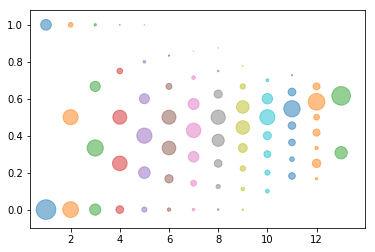

In [105]:
for x, y, s in zip(xa, ya, sizea):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s), alpha = 0.5)

In [14]:
from sklearn import datasets

iris = datasets.load_iris()

In [83]:
def generate_random_sampling(data_sample, data_labels):
    for x_at in tqdm(range(1, len(data_sample))):

        scores = {}
        for i in range(100000):
            tests_entry = np.random.choice(len(data_sample), x_at, replace=False)

            x = np.take(data_sample, tests_entry, axis=0)
            y = np.take(data_labels, tests_entry, axis=0)
            X = np.delete(data_sample, tests_entry, axis=0)
            Y = np.delete(data_labels, tests_entry, axis=0)

            my_tree = DecisionTreeClassifier()
            my_tree = my_tree.fit(X, Y)
            score = my_tree.score(x, y)

            del(my_tree)

            if(not score in scores):
                scores[score] = 1
            else:
                scores[score] += 1

        scores_y_axis = []
        score_size = []
        for key, value in scores.items():
            scores_y_axis.append(key)
            score_size.append(value)

        yield x_at, scores_y_axis, score_size

In [41]:
xs = []
ys = []
sizes = []
for xat, scorey, scoresize in generate_random_sampling(iris.data, iris.target):
    xs.append(xat)
    ys.append(scorey)
    sizes.append(scoresize)

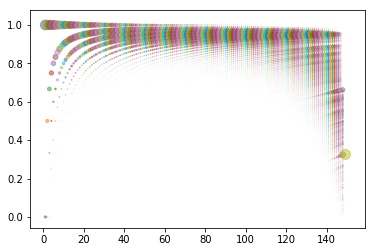

In [80]:
for x, y, s in zip(xs, ys, sizes):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/1000 , alpha = 0.5)

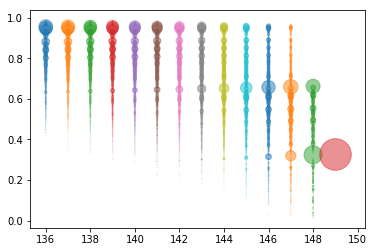

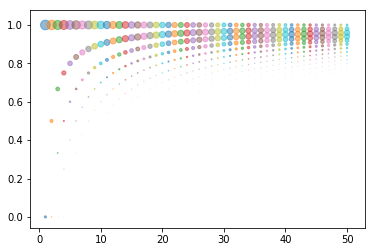

In [113]:
for x, y, s in zip(xs[-14:], ys[-14:], sizes[-14:]):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/100 , alpha = 0.5)

plt.show()
for x, y, s in zip(xs[:50], ys[:50], sizes[:50]):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/1000 , alpha = 0.5)

In [58]:
breast = datasets.load_breast_cancer()

In [72]:
xb = []
yb = []
sizeb = []
for xat, scorey, scoresize in generate_random_sampling(breast.data, breast.target):
    xb.append(xat)
    yb.append(scorey)
    sizeb.append(scoresize)

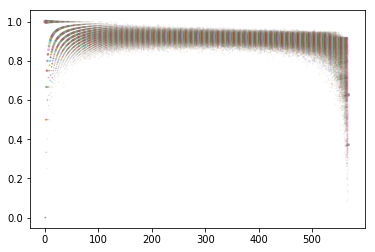

In [102]:
for x, y, s in zip(xb, yb, sizeb):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/100 , alpha = 0.5)

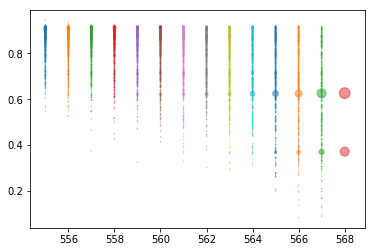

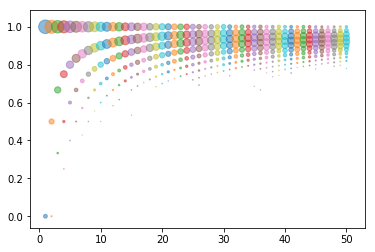

In [110]:
for x, y, s in zip(xb[-14:], yb[-14:], sizeb[-14:]):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/5, alpha = 0.5)
plt.show()

for x, y, s in zip(xb[:50], yb[:50], sizeb[:50]):
    plt.scatter(np.ones(len(y))*x, y, s = np.array(s)/5, alpha = 0.5)

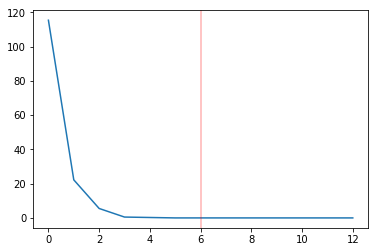

In [125]:
qte_localized = []
low = -1
for x, y, s in zip(xa, ya, sizea):
    if(y[-1] == 1.0):
        qte_localized.append(np.array(s)[-1])
    else:
        if(low == -1):
            low = x
        qte_localized.append(0)
        continue

plt.plot(qte_localized)
plt.axvline(low, color="red", alpha=0.3)

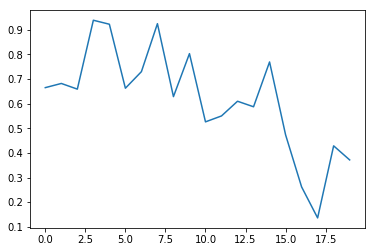

In [129]:
highest_qte = []
for x, y, s in zip(xb[-20:], yb[-20:], sizeb[-20:]):
    highest_qte.append(y[-1])
    
plt.plot(highest_qte);

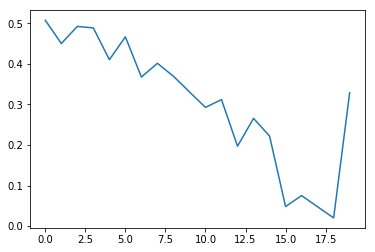

In [130]:
highest_qte = []
for x, y, s in zip(xs[-20:], ys[-20:], sizes[-20:]):
    highest_qte.append(y[-1])
    
plt.plot(highest_qte);

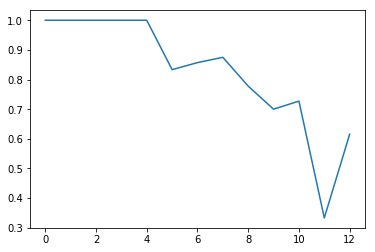

In [131]:
highest_qte = []
for x, y, s in zip(xa, ya, sizea):
    highest_qte.append(y[-1])
    
plt.plot(highest_qte);